# 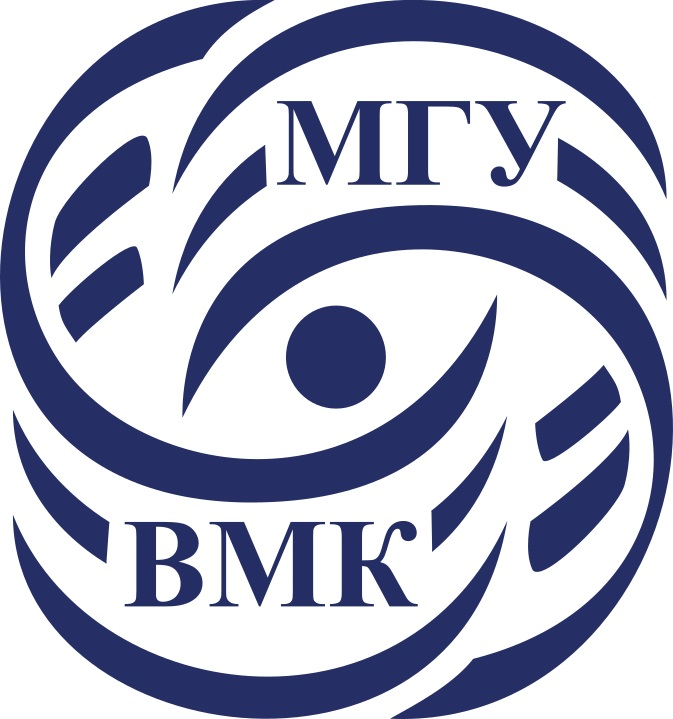

# Машинное обучение. ВМК МГУ

# Практическое задание 2. Knn: классификация и регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [14]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   360  100   360    0     0   1803      0 --:--:-- --:--:-- --:--:--  1809


Проверим версию библиотеки:

In [15]:
import catboost
assert(catboost.__version__ == '1.2.8')


<font color='OrangeRed'>**Внимание!**</font> Перед выполнение данного задания рекомендуем сначала погрузиться в [Base] ноутбук по основам sklearn, нормализации и кросс-валидации, так как данные техники и понятия будут активно использоваться в данном ноутбук

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 1. Нормализация признакового пространства

В данном части задания исследуем, как нормализация (скейлинг) данных влияет на разделимость данных

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [18]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 18.3MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [19]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [20]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

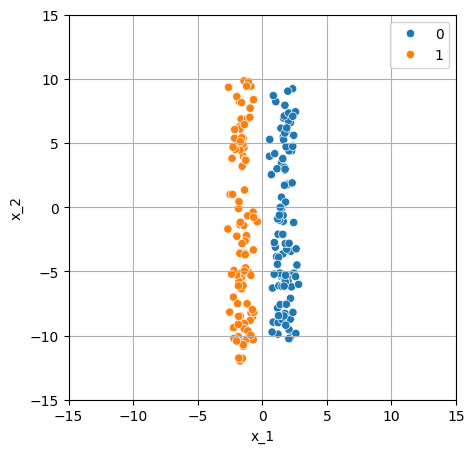

In [21]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [22]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

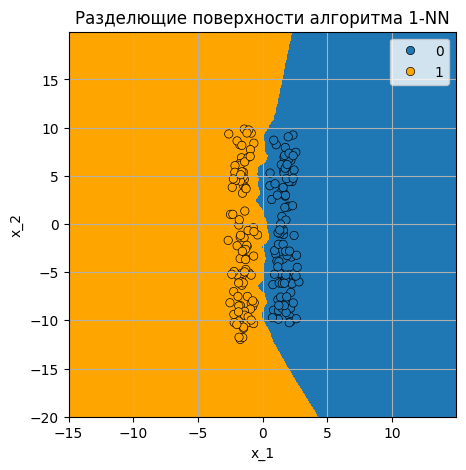

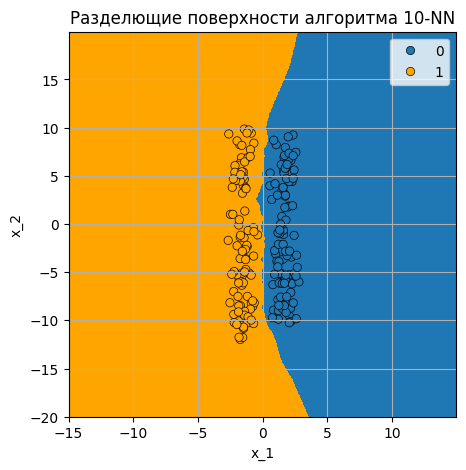

In [23]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

## <font color='DarkOrange'>**Задание 1.1 (кросс-проверка, 1,5 балла)**</font>

 Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте <font color='OrangeRed'>**строгое математическое обоснование**</font> наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией (скейлингом) признаков.

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>


Рассмотрим двумерный случай. Для точки $x = (x_1, x_2)$ и двух обучающих точек
$A = (a_1, a_2)$, $B = (b_1, b_2)$ квадраты евклидовых расстояний равны:
\begin{aligned}
d^2(x, A) = (x_1 - a_1)^2 + (x_2 - a_2)^2, \quad
d^2(x, B) = (x_1 - b_1)^2 + (x_2 - b_2)^2.
\end{aligned}

Точка $x$ классифицируется как принадлежащая классу $A$, если
\begin{aligned}
d^2(x, A) - d^2(x, B) < 0.
\end{aligned}

Раскроем разность:
\begin{aligned}
d^2(x, A) - d^2(x, B)
&= (b_1 - a_1)(2x_1 - a_1 - b_1) \\
&\quad + (b_2 - a_2)(2x_2 - a_2 - b_2).
\end{aligned}

Обозначим слагаемые $T_1$ и $T_2$ — вклады от признаков $x_1$ и $x_2$ соответственно.
Решение определяется знаком суммы $(T_1 + T_2)$.
Если масштаб или вариация второго признака значительно больше первого
(например, $|x_2|$ велико или $|b_2 - a_2|$ не мало), то $|T_2| \gg |T_1|$,
и знак суммы определяется почти исключительно $T_2$.
Следовательно, граница решений зависит в основном от $x_2$,
что приводит к отклонению разделяющей поверхности от прямой $x_1 = 0$
при больших $|x_2|$.

Теперь применим масштабирование признаков:
\begin{aligned}
\tilde{x}_j = \frac{x_j}{s_j}, \quad s_j > 0,
\end{aligned}
тогда
\begin{aligned}
\|\tilde{x} - \tilde{a}\|^2 = \sum_{j=1}^{2} \left( \frac{x_j - a_j}{s_j} \right)^2.
\end{aligned}

Это эквивалентно взвешенному евклидову расстоянию в исходном пространстве:
\begin{aligned}
\|\tilde{x} - \tilde{a}\|^2 = (x - a)^T S^{-2} (x - a),
\quad S = \operatorname{diag}(s_1, s_2).
\end{aligned}

Если выбрать $s_j$ пропорционально масштабу или стандартному отклонению признака
($s_j \approx \sigma_j$), то вклады признаков становятся сопоставимыми:
\begin{aligned}
\frac{(\Delta x_2 / s_2)^2}{(\Delta x_1 / s_1)^2}
= \frac{(\Delta x_2)^2}{(\Delta x_1)^2} \cdot \frac{s_1^2}{s_2^2}
\approx \frac{(\Delta x_2)^2}{(\Delta x_1)^2} \cdot \frac{\sigma_1^2}{\sigma_2^2}.
\end{aligned}

Такое масштабирование устраняет дисбаланс между признаками
и предотвращает доминирование того из них, который имеет больший разброс
или диапазон значений.

Вывод:
Евклидово расстояние складывает квадраты вкладов по каждому признаку,
поэтому признак с большей шкалой или дисперсией вносит непропорционально большой вклад
в метрику расстояния. Это приводит к тому, что алгоритм KNN принимает решения
в основном по этому признаку, и разделяющая граница искажается
(в данном случае — отклоняется от прямой $x_1 = 0$ при больших $|x_2|$).
Нормализация (масштабирование или стандартизация) делит вклад каждого признака на $s_j^2$,
уравновешивая их влияние; после этого расстояния отражают признаки сопоставимо,
и разделяющая поверхность выпрямляется, соответствуя реальной зависимости метки от $x_1$.

---

## <font color='DarkOrange'>**Задание 1.2 (кросс-проверка, 2 балла)**</font>


 Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется <font color='OrangeRed'>**математически строго, однозначно и с полным обоснованием**</font> определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

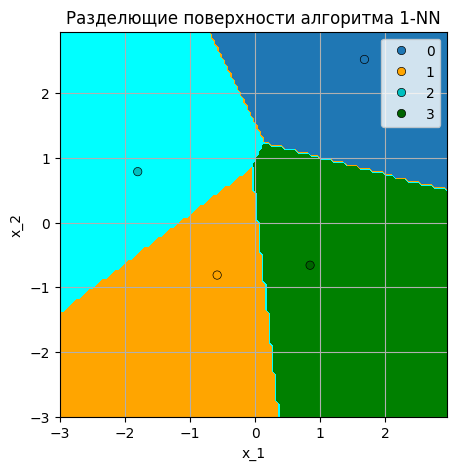

In [24]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Пусть
\begin{aligned}
P = \{p_1, \dots, p_n\} \subset \mathbb{R}^2
\end{aligned}
— набор попарно различных точек, каждая \(p_i\) представляет отдельный класс.  
Для произвольной точки классификатор 1-NN присваивает метку

\begin{aligned}
\operatorname{label}(x) = \arg\min_i \|x - p_i\|_2.
\end{aligned}

Для фиксированного \(i\) определим ячейку ближайшего соседа:
\begin{aligned}
V_i = \{x \in \mathbb{R}^2 : \|x - p_i\| \le \|x - p_j\| \ \text{для всех } j \ne i\}.
\end{aligned}

Для каждой пары \(i \ne j\) введём множество
\begin{aligned}
H_{ij} := \{x : \|x - p_i\|^2 \le \|x - p_j\|^2\}.
\end{aligned}

Так как
\begin{aligned}
\|x - p_i\|^2 - \|x - p_j\|^2
&= (x^T x - 2p_i^T x + \|p_i\|^2) - (x^T x - 2p_j^T x + \|p_j\|^2) \\
&= 2(p_j - p_i)^T x + \|p_i\|^2 - \|p_j\|^2,
\end{aligned}
то неравенство линейно по \(x\), а значит, \(H_{ij}\) — это полуплоскость.  
Следовательно,
\begin{aligned}
V_i = \bigcap_{j \ne i} H_{ij}
\end{aligned}
— пересечение конечного числа полуплоскостей, то есть замкнутое выпуклое множество
(в плоскости — выпуклый многоугольник или многоугольник с бесконечными рёбрами).

Разделяющая граница классификатора — это объединение границ этих областей:
\begin{aligned}
\mathcal{B} = \bigcup_{i=1}^n \partial V_i.
\end{aligned}

Для пары \(i,j\) множество точек, равноудалённых от \(p_i\) и \(p_j\), задаётся как
\begin{aligned}
B_{ij}
&= \{x : \|x - p_i\| = \|x - p_j\|\} \\
&= \{x : 2(p_j - p_i)^T x = \|p_j\|^2 - \|p_i\|^2\}.
\end{aligned}

Таким образом, \(B_{ij}\) — прямая, перпендикулярная отрезку \(p_i p_j\) и проходящая через его середину (перпендикулярный биссектор).  
Отрезки этих прямых, принадлежащие одновременно границам двух соседних ячеек, образуют рёбра диаграммы Вороного, а их пересечения — вершины.

Иными словами, точка \(x\) принадлежит границе \(\mathcal{B}\), если существуют такие \(i != j\), что
\begin{aligned}
\|x - p_i\| = \|x - p_j\| \le \|x - p_k\|, \quad \forall k.
\end{aligned}

Вывод: Разделяющие поверхности классификатора 1-NN для произвольного множества точек на плоскости образуют \textit{диаграмму Вороного}.  
Каждая область \(V_i\) — множество точек, для которых ближайший сосед — \(p_i\);  
граница между классами — это объединение участков перпендикулярных биссекторов между точками, то есть геометрическое место точек, равноудалённых от как минимум двух обучающих объектов.


# Часть 2. Кросс-валидация

Чтобы закрепить понимание устройства кросс-валидации предлагаем вам запрограммировать данный метод самостоятельно

## <font color='DarkOrange'>**Задание 2.1 (unit-tests, 3 балла)**</font>

 В модуле `cross_val.py` реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике.

- В качестве метрики качества будем использовать $accuracy\_score$.

<font color='CornflowerBlue'>**Accuracy**</font> - это доля верно классифицированных объектов, среди всех объектов выборки.

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [27]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [28]:
X_train = np.array(X_train, dtype=object)

In [29]:
X_test = np.array(X_test, dtype=object)

In [30]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* <font color='plum'>**Токенизация.**</font> Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* <font color='plum'>**Нормализация.**</font> Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* <font color='plum'>**Векторизация.**</font> Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации.

* Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа.

*  Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ предлагаем изучить самостоятельно, например, [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

<font color='MediumTurquoise'>**Полезные ссылки**</font>

Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В `sklearn` все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [31]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

## <font color='DarkOrange'>**Задание 3.1 (кросс-проверка, 0,5 баллa)**</font>

 Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке.

 - Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [32]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [41]:
#ваш код
from cross_val import kfold_split, knn_cv_score

score_function = accuracy_score
results = knn_cv_score(X_train, y_train, parameters, score_function, kfold_split(X_train.shape[0], 3),
                       neighbors.KNeighborsClassifier)

In [42]:
results

{('CountVectorizer', 1, 'cosine', 'uniform'): np.float64(0.6720876113676221),
 ('CountVectorizer', 1, 'cosine', 'distance'): np.float64(0.6720876113676221),
 ('CountVectorizer', 2, 'cosine', 'uniform'): np.float64(0.6105720537161098),
 ('CountVectorizer', 2, 'cosine', 'distance'): np.float64(0.6724411869001953),
 ('CountVectorizer', 3, 'cosine', 'uniform'): np.float64(0.6175544674577872),
 ('CountVectorizer', 3, 'cosine', 'distance'): np.float64(0.6680223129407801),
 ('CountVectorizer', 4, 'cosine', 'uniform'): np.float64(0.615433107999234),
 ('CountVectorizer', 4, 'cosine', 'distance'): np.float64(0.6667849860505454),
 ('CountVectorizer', 5, 'cosine', 'uniform'): np.float64(0.6187031661226646),
 ('CountVectorizer', 5, 'cosine', 'distance'): np.float64(0.6642213525313975),
 ('CountVectorizer', 6, 'cosine', 'uniform'): np.float64(0.6145485130096019),
 ('CountVectorizer', 6, 'cosine', 'distance'): np.float64(0.6593602279456089),
 ('CountVectorizer', 7, 'cosine', 'uniform'): np.float64(0.

In [44]:
index = max(results, key=results.get)
print(index, results[index])

('TfidfVectorizer', 1, 'cosine', 'uniform') 0.6932994249523278


## <font color='DarkOrange'>**Задание 3.2 (кросс-проверка, 0,5 балл)**</font>

 Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [45]:
#ваш код
count_vec_output = []
tf_idf_output = []
for i, j in results.items():
    if i[0] == "CountVectorizer":
        count_vec_output.append(j)
    else:
        tf_idf_output.append(j)
if np.mean(np.array(count_vec_output)) > np.mean(np.array(tf_idf_output)):
    print(f"Best preprocessing is CountVectorizer with average value "
          f"{np.mean(np.array(count_vec_output))}")
else:
    print(f"Best preprocessing is TfidfVectorizer with average value "
          f"{np.mean(np.array(tf_idf_output))}")

Best preprocessing is TfidfVectorizer with average value 0.6625199155730619


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Лучший результат на данной задаче даёт TfidfVectorizer

Это происходит из-за того, что TfidfVectorizer
 помимо учёта числа вхождений токена в данный текст, также учитывает его вхождения в другие тексты. Это позволяет корректнее обрабатывать случаи, когда токен встречается часто во всех текстах или, наоборот, только в этом (придаёт больший вес токенам, встречающихся часто только в одной категории)

## <font color='DarkOrange'>**Задание 3.3 (кросс-проверка, 1 балл)**</font>

 Начертите график (line plot) зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параметрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

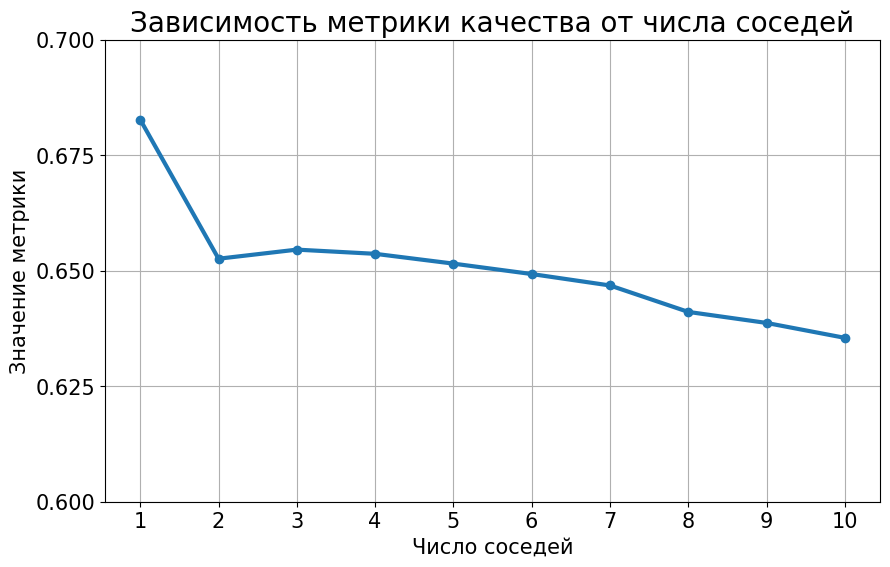

In [46]:
#ваш код
import matplotlib.pyplot as plt

ans = np.zeros(10)
for i, j in results.items():
    ans[i[1]-1] += j
ans = np.divide(ans, 4)

fig = plt.figure(figsize=(10, 6), facecolor='white', edgecolor='black', frameon=True)

plt.plot(np.arange(1, 11), ans, linewidth=3, marker="o")
plt.grid(True)
plt.title("Зависимость метрики качества от числа соседей", fontsize=20)
plt.ylabel("Значение метрики", fontsize=15)
plt.xlabel("Число соседей", fontsize=15)
plt.xticks(np.arange(1, 11, 1), fontsize=15)
plt.yticks(np.arange(0.6, 0.725, 0.025), fontsize=15)
plt.show()

In [47]:
print(*list(fetch_20newsgroups().target_names), sep="\n")

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Наиболее эффективным является классификатор с числом соседей = 1. Это связано с тем, что при большем числе соседей классификации мешают похожи классы, т.е. те, названия которых начинаются одинаково.



## <font color='DarkOrange'>**Задание 3.4 (кросс-проверка, 1,5 баллa)**</font>

 Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [48]:
#ваш код
best_knn = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='cosine')
tf_idf.fit(X_train)
X_train_norm = tf_idf.transform(X_train)
X_test_norm = tf_idf.transform(X_test)

best_knn.fit(X_train_norm, y_train)
print(accuracy_score(y_test, best_knn.predict(X_test_norm)))

0.531465746149761


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Кросс валидация: 0.6625199155730619

Тестовая выборка: 0.531465746149761

Возможны причины отличия: Дисбаланс классов. Во время кросс-валидации мы разбивали обучающую выборку разными способами, что позволяло увеличить объём данных и более сбалансированно оценить результат
Параметры модели были оптимизированы под кросс-валидацию. Иногда при настройке гиперпараметров модели мы можем непреднамеренно подогнать их под особенности обучающих и кросс-валидационных данных, что снижает производительность на независимых тестовых данных.
Переобучение. Модель может хорошо работать на обучающих данных и показывать высокую точность при кросс-валидации, но плохо обобщаться на новых, невидимых данных.
Шум в данных. Так как во время кросс-валидации мы берём среднее значение по всем прогонам, то модель менее чувствительна к шуму в данных

# <font color='MediumSeaGreen'>**Бонус [0,5 балла]**</font>

 Вставьте мем, описывающий ваше состоянии после решения данного ноутбука

Ваша картинка тут
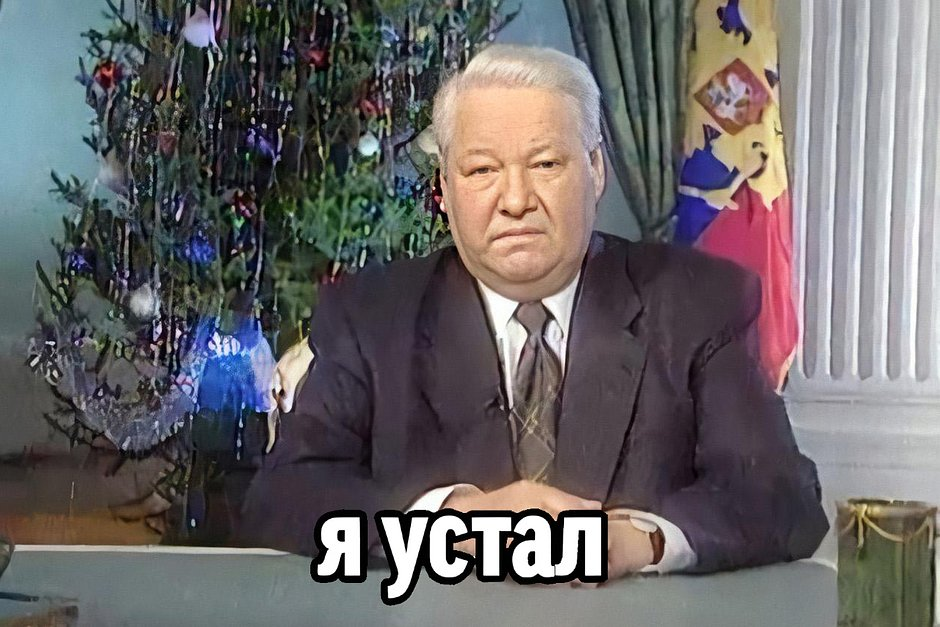